In [11]:
!pip install matplotlib



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.1/8.1 MB 1.3 MB/s eta 0:00:07
     ---------------------------------------- 0.1/8.1 MB 1.1 MB/s eta 0:00:08
      --------------------------------------- 0.2/8.1 MB 1.3 MB/s eta 0:00:07
      --------------------------------------- 0.2/8.1 MB 1.2 MB/s eta 0:00:07
      --------------------------------------- 0.2/8.1 MB 1.2 MB/s eta 0:00:07
     - -------------------------------------- 0.4/8.1 MB 1.5 MB/s eta 0:00:06
     - -------------------------------------- 0.4/8.1 MB 1.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/8.1 MB 1.7 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/8.1 MB 1.5 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/8.1 MB 1.5 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/8.1 MB 1.5 MB/s eta 0:00:06
     --- ------------------------------------ 0.6/8.1 MB 1.2 MB/s eta 0

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Show more columns in tables
pd.set_option("display.max_colwidth", 120)

# Path to your database (from notebooks/ folder)
db_path = "../data/youtube_analytics.db"

conn = sqlite3.connect(db_path)

channels = pd.read_sql_query("SELECT * FROM channels", conn)
videos = pd.read_sql_query("SELECT * FROM videos", conn)
video_stats = pd.read_sql_query("SELECT * FROM video_stats", conn)

channels, videos.head(), video_stats.head()


(                 channel_id   channel_name  \
 0  UCHAUb7xQtnLPcVwY-uKwK3Q  AMERICA_ABBAI   
 
                                                 channel_url  subscriber_count  \
 0  https://www.youtube.com/channel/UCHAUb7xQtnLPcVwY-uKwK3Q               700   
 
    total_views  video_count                  created_at  \
 0       306012          125  2023-08-09 14:34:54.675876   
 
                    fetched_at  
 0  2025-11-27 23:29:38.208465  ,
       video_id                channel_id  \
 0  cR2YWzu3vAc  UCHAUb7xQtnLPcVwY-uKwK3Q   
 1  qlKMaW4cSUQ  UCHAUb7xQtnLPcVwY-uKwK3Q   
 2  WwUogLSmjS8  UCHAUb7xQtnLPcVwY-uKwK3Q   
 3  JIR0m0VZ7dM  UCHAUb7xQtnLPcVwY-uKwK3Q   
 4  sFzP5Ead09E  UCHAUb7xQtnLPcVwY-uKwK3Q   
 
                                                                                                  title  \
 0      First Time at Topgolf! #fun #game #shorts #golfgame #golf #funnygame #play #desiinusa #trending   
 1  Golf Game Challenge #shorts #trending #golf #viral #golfgam

In [13]:
channel = channels.iloc[0]

print("CHANNEL OVERVIEW")
print("----------------")
print("Channel Name     :", channel["channel_name"])
print("Channel URL      :", channel["channel_url"])
print("Subscribers      :", channel["subscriber_count"])
print("Total Views      :", channel["total_views"])
print("Total Video Count:", channel["video_count"])
print("Channel Created  :", channel["created_at"])
print("Data Fetched At  :", channels["fetched_at"].max())


CHANNEL OVERVIEW
----------------
Channel Name     : AMERICA_ABBAI
Channel URL      : https://www.youtube.com/channel/UCHAUb7xQtnLPcVwY-uKwK3Q
Subscribers      : 700
Total Views      : 306012
Total Video Count: 125
Channel Created  : 2023-08-09 14:34:54.675876
Data Fetched At  : 2025-11-27 23:29:38.208465


In [14]:
video_data = (
    video_stats
    .merge(videos, on="video_id", how="left")
)

video_data.head()


,stat_id,video_id,snapshot_date,views,likes,comments,channel_id,title,description,published_at,duration_seconds,tags,category
0,1,cR2YWzu3vAc,2025-11-27 23:29:38.737036,378,11,0,UCHAUb7xQtnLPcVwY-uKwK3Q,First Time at Topgolf! #fun #game #shorts #golfgame #golf #funnygame #play #desiinusa #trending,Topgolf\nTopgolf vlog\nTopgolf first time\nTopgolf 2025\nTopgolf experience\nTopgolf USA\nTopgolf food and drinks\nF...,2025-07-11 05:12:02.000000,26,"Topgolf,Topgolf vlog,Topgolf first time,Topgolf 2025,Topgolf experience,Topgolf USA,Topgolf food and drinks,Fun thin...",28
1,2,qlKMaW4cSUQ,2025-11-27 23:29:39.443927,736,12,0,UCHAUb7xQtnLPcVwY-uKwK3Q,Golf Game Challenge #shorts #trending #golf #viral #golfgame #telugushorts #desiinusa #golfshorts #,Golf gameplay 2025\nBest golf shots\nHole in one golf moment\nRealistic golf simulator\nGolf game challenge\nPGA Tou...,2025-07-09 14:38:32.000000,45,"golf gameplay,golf game,hole in one,golf simulator,golf gaming,realistic golf game,golf challenge,golf tips,PGA Tour...",28
2,3,WwUogLSmjS8,2025-11-27 23:29:40.012855,806,9,0,UCHAUb7xQtnLPcVwY-uKwK3Q,గోల్ఫ్ ఆడు రా అంటే… క్రికెట్ ఆడుతున్నాడు మావడు! 😂 #shorts #golf #cricket #topgolf #trend #playing,"telugu comedy, telugu funny video, village comedy, telugu short film, telugu skit, telugu reels, golfaadura, cricket...",2025-07-06 00:58:52.000000,11,"telugu comedy,telugu funny video,village comedy,telugu short film,telugu skit,telugu reels,golfaadura,cricketfunny,f...",28
3,4,JIR0m0VZ7dM,2025-11-27 23:29:40.574890,1412,9,0,UCHAUb7xQtnLPcVwY-uKwK3Q,Viral Water Glass Magic Trick | Turmeric Water Experiment |Home Science #viral #short #magic,"turmeric water magic, \nwater glass magic trick, \nviral science experiment, \nDIY science trick, \nturmeric magic, ...",2025-07-05 01:32:40.000000,24,"turmeric water magic,water glass magic trick,viral science experiment,DIY science trick,turmeric magic,home science ...",28
4,5,sFzP5Ead09E,2025-11-27 23:29:41.169356,2766,26,0,UCHAUb7xQtnLPcVwY-uKwK3Q,ఆకాశంలో హెలికాప్టర్..! ఒక్కసారిగా వచ్చిందేంటి?😱😳 #shorts #viral #trending #reels #helicopter #sky,helicopter in sky\nhelicopter video in Telugu\nhelicopter flying in sky\nTelugu helicopter footage\namazing sky view...,2025-07-03 05:46:22.000000,10,None,22


In [15]:
top_views = (
    video_data
    .sort_values("views", ascending=False)
    .head(10)
)

top_views[["title", "views", "likes", "comments", "snapshot_date", "published_at"]]


,title,views,likes,comments,snapshot_date,published_at
14,"Air India Boeing 787 Crash in Gujarat: 241 Dead, 1 Survivor | #shorts #airindiaflights #trending",7840,46,5,2025-11-27 23:29:46.677225,2025-06-14 02:00:44.000000
20,Finally! Virat Kohli Lifts the IPL Trophy 🏆 | RCB Wins IPL 2025 | Emotional Moment ❤️🔥#rcb #shorts,5941,304,16,2025-11-27 23:29:49.960604,2025-06-04 01:00:08.000000
19,First Time Solo Trip – What REALLY Happened! Don't Miss |#shorts #solotravel #vacationvibes #trip,4571,91,4,2025-11-27 23:29:49.396550,2025-06-06 01:45:06.000000
23,మజా మామూలుగా లేదు!”America lo Baseball #games #baseball #baseballbat #reels #trendingshorts,4011,44,1,2025-11-27 23:29:51.578479,2025-05-29 05:40:34.000000
8,ఏముంది రా అక్కడ కటింగ్ చూపిస్తున్నావ్ 😂✂️ |#shorts #hairstyle #saloon #cuttingskills #viral #style,3346,28,0,2025-11-27 23:29:43.337342,2025-06-24 03:15:46.000000
4,ఆకాశంలో హెలికాప్టర్..! ఒక్కసారిగా వచ్చిందేంటి?😱😳 #shorts #viral #trending #reels #helicopter #sky,2766,26,0,2025-11-27 23:29:41.169356,2025-07-03 05:46:22.000000
16,"Every Year, the Same Promise from My Friend… 💔| #shorts #viral #trending #newyear #2025",2366,41,0,2025-11-27 23:29:47.765783,2025-06-10 01:30:32.000000
15,Funny 😁 Wait for end 😂|#comdey #funny #shorts #reels #america_abbai #free #viral #trending #india,1806,24,1,2025-11-27 23:29:47.201448,2025-06-12 04:49:56.000000
27,"""True Friendship = Support Without Conditions 🙌💖""#friendship #shorts #motivation #support #trend",1727,36,7,2025-11-27 23:29:53.795838,2025-05-25 11:30:06.000000
18,American Roads Before vs After Storm 🌪️| Don't Miss |#shorts #rain #storm #road #traffic,1624,33,0,2025-11-27 23:29:48.844914,2025-06-07 03:00:26.000000


In [16]:
video_data["engagement"] = video_data["likes"] + video_data["comments"]

top_engagement = (
    video_data
    .sort_values("engagement", ascending=False)
    .head(10)
)

top_engagement[["title", "engagement", "views", "likes", "comments", "snapshot_date"]]


,title,engagement,views,likes,comments,snapshot_date
20,Finally! Virat Kohli Lifts the IPL Trophy 🏆 | RCB Wins IPL 2025 | Emotional Moment ❤️🔥#rcb #shorts,320,5941,304,16,2025-11-27 23:29:49.960604
19,First Time Solo Trip – What REALLY Happened! Don't Miss |#shorts #solotravel #vacationvibes #trip,95,4571,91,4,2025-11-27 23:29:49.396550
22,"అమెరికా డాలర్లు భారత రూపాయల్లో ఎంత? | 1 USD to INR Explained!"" |#teluguvlogs #america_abbai #dollar",78,173,39,39,2025-11-27 23:29:51.031577
12,📿 God’s Power Onscreen! Vinayakudu | #shorts #trending #monday #devonational #ganapati #moriya,60,1548,60,0,2025-11-27 23:29:45.549861
14,"Air India Boeing 787 Crash in Gujarat: 241 Dead, 1 Survivor | #shorts #airindiaflights #trending",51,7840,46,5,2025-11-27 23:29:46.677225
23,మజా మామూలుగా లేదు!”America lo Baseball #games #baseball #baseballbat #reels #trendingshorts,45,4011,44,1,2025-11-27 23:29:51.578479
25,America Mangoes vs India Mangoes 🍋🇮🇳🇺🇸 | @New9_Crystals #shorts #viralvideo,44,866,39,5,2025-11-27 23:29:52.695501
27,"""True Friendship = Support Without Conditions 🙌💖""#friendship #shorts #motivation #support #trend",43,1727,36,7,2025-11-27 23:29:53.795838
16,"Every Year, the Same Promise from My Friend… 💔| #shorts #viral #trending #newyear #2025",41,2366,41,0,2025-11-27 23:29:47.765783
26,Meeku appatlo aastulu undayata. | #funnydance #reels #mallasudu #telugureels #viralvideo #comdey,38,727,36,2,2025-11-27 23:29:53.230259


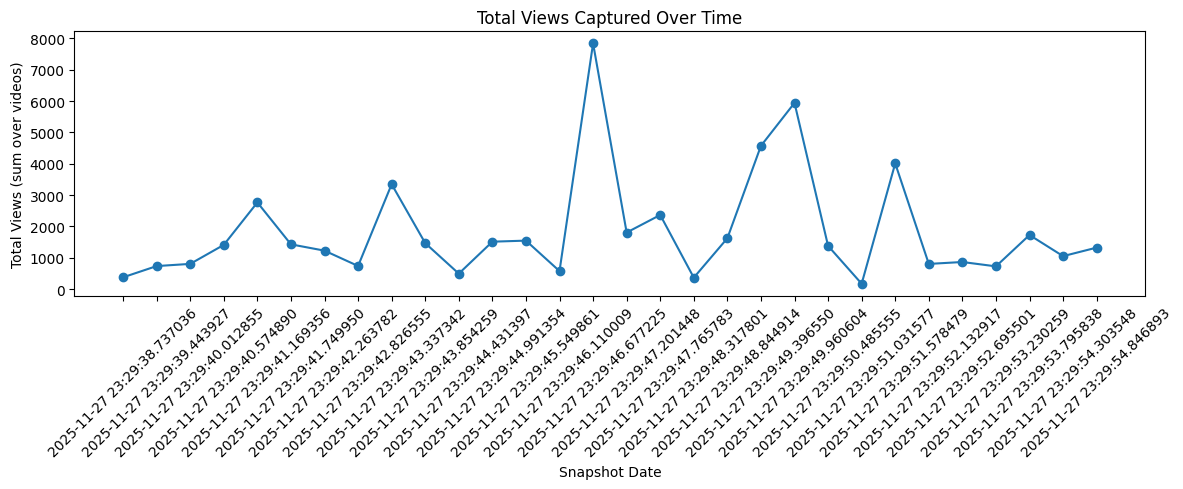

In [17]:
# Aggregate total views per snapshot_date
views_over_time = (
    video_data
    .groupby("snapshot_date")["views"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,5))
plt.plot(views_over_time["snapshot_date"], views_over_time["views"], marker="o")
plt.title("Total Views Captured Over Time")
plt.xlabel("Snapshot Date")
plt.ylabel("Total Views (sum over videos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\saich\AppData\Local\Temp\ipykernel_20988\969275665.py:7: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\saich\AppData\Local\Temp\ipykernel_20988\969275665.py:7: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\saich\AppData\Local\Temp\ipykernel_20988\969275665.py:7: UserWarning: Glyph 3118 (\N{TELUGU LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\saich\AppData\Local\Temp\ipykernel_20988\969275665.py:7: UserWarning: Matplotlib currently does not support Telugu natively.
  plt.tight_layout()
C:\Users\saich\AppData\Local\Temp\ipykernel_20988\969275665.py:7: UserWarning: Glyph 3100 (\N{TELUGU LETTER JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\saich\AppData\Local\Temp\ipykernel_20988\969275665.py:7: UserWarning: Glyph 3134 (\N{TELUGU VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\saich\AppD

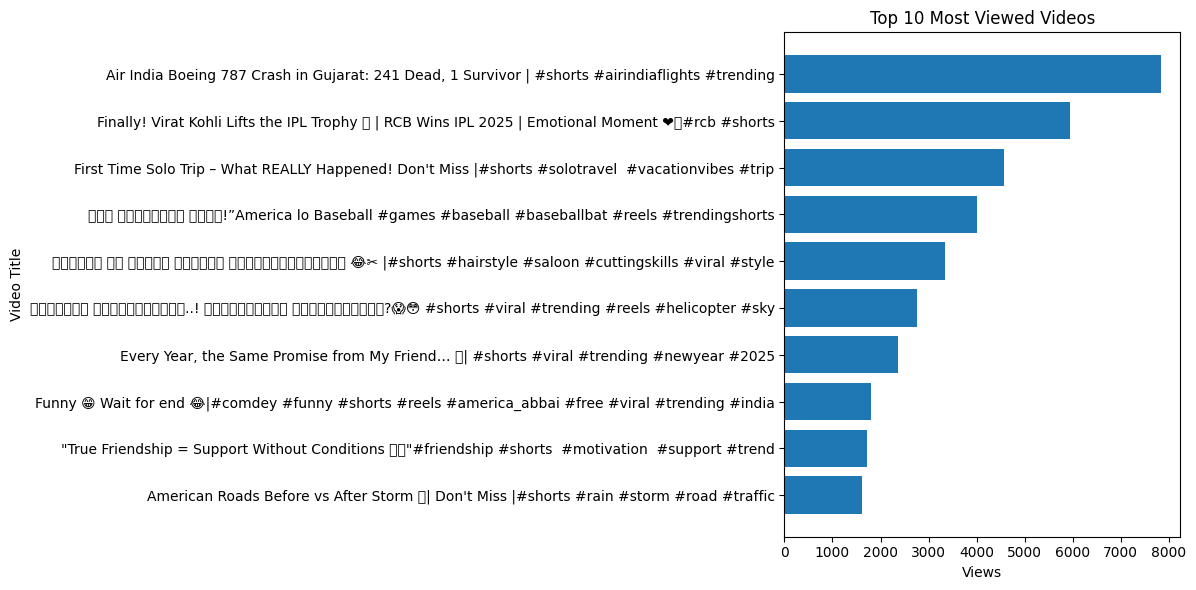

In [18]:
plt.figure(figsize=(12,6))
plt.barh(top_views["title"], top_views["views"])
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.title("Top 10 Most Viewed Videos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
print("TOTAL VIDEOS ANALYZED :", len(video_data))

print("\nViews statistics:")
print(video_data["views"].describe())

print("\nLikes statistics:")
print(video_data["likes"].describe())

print("\nComments statistics:")
print(video_data["comments"].describe())


TOTAL VIDEOS ANALYZED : 30

Views statistics:
count      30.000000
mean     1834.100000
std      1740.550059
min       173.000000
25%       755.500000
50%      1396.000000
75%      1786.250000
max      7840.000000
Name: views, dtype: float64

Likes statistics:
count     30.000000
mean      38.433333
std       52.855485
min        9.000000
25%       22.000000
50%       26.000000
75%       38.250000
max      304.000000
Name: likes, dtype: float64

Comments statistics:
count    30.000000
mean      2.966667
std       7.549758
min       0.000000
25%       0.000000
50%       0.000000
75%       2.000000
max      39.000000
Name: comments, dtype: float64


: 